In [31]:
# Plano de saúde: Cost prevision from age, using TENSORFLOW 

In [59]:
import numpy as np
from sklearn.preprocessing import StandardScaler

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
import tensorflow as tf

In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [35]:
x = np.array([[18], [20], [25], [22], [27], [31], [33], [39], [47], [58]])
x

array([[18],
       [20],
       [25],
       [22],
       [27],
       [31],
       [33],
       [39],
       [47],
       [58]])

In [36]:
y = np.array([[871], [920], [1100], [1234], [1360], [1450], [1530], [1702], [1876], [1982]])
y

array([[ 871],
       [ 920],
       [1100],
       [1234],
       [1360],
       [1450],
       [1530],
       [1702],
       [1876],
       [1982]])

In [60]:
# scaler (escalonar/normalização/padronização)
scaler_x = StandardScaler()
x = scaler_x.fit_transform(x)

In [38]:
x

array([[-1.15627477],
       [-0.99109266],
       [-0.57813739],
       [-0.82591055],
       [-0.41295528],
       [-0.08259106],
       [ 0.08259106],
       [ 0.57813739],
       [ 1.23886583],
       [ 2.14736744]])

In [39]:
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

C:\Users\Allan Santos\.conda\envs\AM\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Allan Santos\.conda\envs\AM\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [40]:
y

array([[-1.47115466],
       [-1.3355261 ],
       [-0.83729875],
       [-0.46639616],
       [-0.11763701],
       [ 0.13147666],
       [ 0.35291104],
       [ 0.82899496],
       [ 1.31061473],
       [ 1.60401529]])

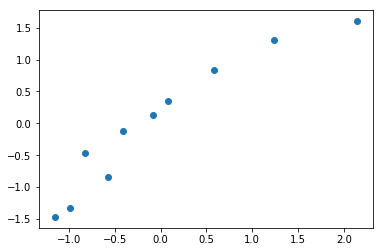

In [41]:
#scaled data plotted
plt.scatter(x, y)

#Simple linear regression formula
y = b0 + b1 * x

In [42]:
#same seed, SAME result: guard seed value!
np.random.seed(0)
np.random.rand(2)

array([0.5488135 , 0.71518937])

In [43]:
b0 = tf.Variable(0.54)
b1 = tf.Variable(0.71)

In [44]:

error = tf.losses.mean_squared_error(y, ( b0 + b1 * x))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
trainning = optimizer.minimize(error)
init = tf.global_variables_initializer()

In [45]:
#NEXT CLASS..part II...

In [46]:
with tf.Session() as ses:
    ses.run(init)
    #Ajuste dos valores: multiplica por cada registro de x, faz o ajuste do parametro pela descida do gradiente
    for i in range(1000):
        ses.run(trainning)
        
    b0_final, b1_final = ses.run([b0, b1])

In [47]:
b0_final

0.07293496

In [48]:
b1_final

0.9182933

In [49]:
previsions = b0_final + b1_final * x
previsions

array([[-0.98886441],
       [-0.83717879],
       [-0.45796472],
       [-0.68549316],
       [-0.3062791 ],
       [-0.00290785],
       [ 0.14877778],
       [ 0.60383465],
       [ 1.21057715],
       [ 2.04484809]])

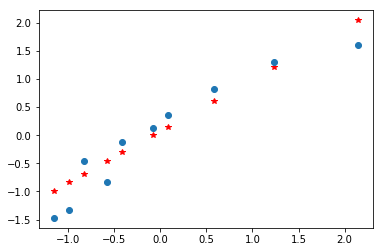

In [50]:
plt.plot(x, previsions, '*', color = 'red')
plt.plot(x, y, 'o')

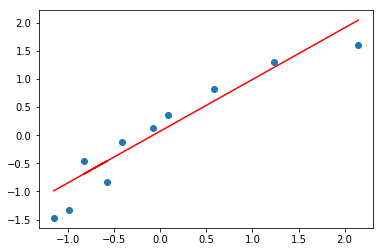

In [51]:
plt.plot(x, previsions, color = 'red')
plt.plot(x, y, 'o')

In [52]:
prevision = b0_final + b1_final * 40
prevision

36.804666854441166

In [64]:
prevision = scaler_y.inverse_transform( b0_final + b1_final * scaler_x.transform(40) )
prevision

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [65]:
#Remover a normalização dos valores
y1 = scaler_y.inverse_transform(y)
y1

array([[ 871.],
       [ 920.],
       [1100.],
       [1234.],
       [1360.],
       [1450.],
       [1530.],
       [1702.],
       [1876.],
       [1982.]])

In [66]:
previsions1 = scaler_y.inverse_transform(previsions)
previsions1

array([[1045.24222857],
       [1100.0433395 ],
       [1237.04611683],
       [1154.84445044],
       [1291.84722777],
       [1401.44944963],
       [1456.25056056],
       [1620.65389336],
       [1839.85833709],
       [2141.26444722]])

In [70]:
mae = mean_absolute_error(y1, previsions1)
mse = mean_squared_error(y1, previsions1)

In [71]:
mae

103.76922132767592

In [72]:
mse

13355.270661578828